<img src="https://upload.wikimedia.org/wikipedia/commons/2/25/LogoUNED.jpg" width="120" height="120" />

# Cálculo Numérico y Estadística Aplicada


## Grado en Química - UNED 
## Primera PEC


Toda la documentación de la práctica se puede encontrar y descargar en: https://github.com/cefera/CNyEA-Quimica-UNED

Se recomienda leer la parte 1 de los apuntes de la asignatura y ejecutar el cuaderno de Jupyter <code>TestEjecucion_CNyEA.ipynb</code> antes de ejecutar este cuaderno.

En la actualidad exiten numerosas librerías para la resolución de numerosos problemas de cálculo numérico. En esta práctica vamos a aprender a utilizar algunas de dichas librerías que se encuentran implementadas en Python. A lo largo del cuaderno se proporcionan enlaces a la documentación de las librerías. Se recomienda consultarlos para la realización de la PEC.

----------------------------------------------------------

Para comenzar, lo primero hace falta que introduzca sus datos en la siguiente celda. Para ello, haga doble click en la celda y rellene los campos. Cuando lo haya hecho pulse <kbd>Shift</kbd>+<kbd>Enter</kbd>

> ---
> - **NOMBRE:** 
> - **APELLIDOS:** 
> - **DNI/NIE/No. PASAPORTE:**
> - **FECHA (dd/mm/aaaa):** 
> ---

En la siguiente celda, se va a asignar su número de DNI/NIE/Pasaporte a la variable <code>uned</code>, para ello, sustituya <code>...</code> por dicho número (sin letras) y ejecute la celda.

In [1]:
uned = 1000

## Carga de librerías

La siguiente celda carga todas las librerías y los datos que posteriormente utilizaremos. Ejecútela.

In [2]:
###########################################################################################
#
#   Librerias
#
###########################################################################################

###########################################################################################
#   Estas son las librerías que se van a emplear en este ejemplo
#   Las librerías son códigos ya desarrollados por otras personas que podemos reutilizar
###########################################################################################

import numpy as np; # esta librería contiene una gran cantidad de funciones de cálculo numérico
import matplotlib.pyplot as plt # esta librería sirve para dibujar gráficas
from scipy import linalg # descomposición LU
from scipy import optimize # para newton y bisección
import scipy.integrate as integrate # integracion

###########################################################
#   Esta es la definición de un par de colores que vamos a utilizar posteriormente en las figuras
jpac_blue   = "#1F77B4"; jpac_red    = "#D61D28"; jpac_green  = "#2CA02C"; jpac_orange = "#FF7F0E";
jpac_purple = "#9467BD"; jpac_brown  = "#8C564B"; jpac_pink   = "#E377C2"; jpac_gold   = "#BCBD22";
jpac_aqua   = "#17BECF"; jpac_grey   = "#7F7F7F";

jpac_color = [jpac_blue, jpac_red, jpac_green, jpac_orange, jpac_purple, jpac_brown,
              jpac_pink, jpac_gold, jpac_aqua, jpac_grey ];

#generacion de los numeros a utilizar
rng = np.random.default_rng(uned);
#print(rng)

# Matrices
def construir_matriz(n,nmin,nmax):
    tamano = int(n*(n+1)/2)
    rints = rng.integers(low=nmin, high=nmax, size=tamano)
    intsg = rng.binomial(1, 0.5, size=tamano)
    intsg = np.where(intsg == 0, -1, intsg)
    A = np.zeros((n,n),dtype='int')
    punto = 0
    for i in np.arange(n):
        A [i,i] = intsg[punto]*rints[punto]
        punto = punto + 1
        for j in np.arange(i+1,n):
            A [i,j] = intsg[punto]*rints[punto]
            A [j,i] = A[i,j]
            punto = punto + 1
    return A

Asize, Amin, Amax = 5, 1, 10; rechazado = True
while (rechazado):
    Ainput = construir_matriz(Asize,Amin,Amax)
    if np.linalg.det(Ainput)!=0:
        rechazado = False

binput = np.transpose(rng.integers(low=Amin, high=Amax, size=Asize))

# Datos para interpolar
def construir_datos(n,xmin,xmax):
    x = np.linspace(xmin,xmax,n)
    y = 10.*rng.random(x.size)
    return x,y

def construir_polinomio(n,nmin,nmax):
    rints = rng.integers(low=nmin, high=nmax, size=n)
    intsg = rng.binomial(1, 0.5, size=n)
    intsg = np.where(intsg == 0, -1, intsg)
    return np.array(intsg*rints)

ndatos = 6
xinput, yinput = construir_datos(ndatos,1.,11.)

# Polinomio para resolución de ecuaciones no lineales
proots = rng.integers(low=-10, high=10, size=3)
ppol = np.polynomial.polynomial.Polynomial.fromroots(proots)
pcoef = np.flip(ppol.coef)
ppol = np.poly1d(pcoef)
       
print('Ahora las librerías y los datos están cargados y disponibles para ser utilizados')

Ahora las librerías y los datos están cargados y disponibles para ser utilizados


En primer lugar vamos a realizar un cálculo sencillo. El coseno de $\pi$. Para ello vamos a utilizar la función <code>cos</code> de <code>numpy</code> y el número $\pi$ que está almacenado en la variable <code>pi</code> de la misma libreria. Por ello, si queremos calcular $\cos \pi$ la línea de código a escribir será <code>np.cos(np.pi)</code>. Sustituya los puntos suspensivos <code>...</code> en la siguiente celda por <code>np.cos(np.pi)</code> y ejecútela. Debe obtener <code>-1.0</code>

In [3]:
np.cos(np.pi)

-1.0

Hemos cargado tres librerías: <code>numpy</code> con el alias <code>np</code>, <code>matplotlib.pyplot</code> con el alias <code>plt</code>, <code>scipy.linalg</code> con el alias <code>linalg</code>

Vamos a comenzar con la resolución de sistemas de ecuaciones.

## Sistemas de ecuaciones

Ejecute la siguiente celda.

In [4]:
print('Primero se va a trabajar con sistemas de ecuaciones.')
print('Supongamos un sistema de ecuaciones lineales dado por la siguiente matriz A simétrica:')
print('A=',Ainput)
print('Y por el siguiente vector b:')
for i in range(Asize):
    if i==0:
        print('b=[',binput[i])
    elif i==Asize-1:
        print('   ',binput[i],']')
    else:
        print('   ',binput[i])

Primero se va a trabajar con sistemas de ecuaciones.
Supongamos un sistema de ecuaciones lineales dado por la siguiente matriz A simétrica:
A= [[ 2  5  8 -6 -8]
 [ 5  5  2 -2 -5]
 [ 8  2  5  3  2]
 [-6 -2  3  5 -3]
 [-8 -5  2 -3  3]]
Y por el siguiente vector b:
b=[ 7
    8
    5
    4
    1 ]


Vamos a calcular la factorización $LU$ y a diagonalizar la matriz $A$

En primer lugar defina la matriz $A$ y el vector $b$. Para ello ha de utilizar las funcines <code>matrix</code> y <code>array</code> de <code>numpy</code> cuya documentación puede encontrar en https://numpy.org/doc/2.0/reference/generated/numpy.matrix.html y en https://numpy.org/doc/stable/reference/generated/numpy.array.html#numpy.array. Rellene los huecos <code>...</code> de la siguiente celda con los valores de $A$ y $b$ dados en la celda anterior.

In [5]:
A = np.matrix(' 2  5  8 -6 -8; 5  5  2 -2 -5; 8  2  5  3  2; -6 -2  3  5 -3; -8 -5  2 -3  3 ' );
b = np.array([7, 8, 5, 4, 1 ]);
print('Comprobamos que A está correctamente definido imprimiéndolo en pantalla')
print('A =',A)
print('Comprobamos que b está correctamente definido imprimiéndolo en pantalla (aparece transpuesto, eso está bien)')
print('b =',b)

Comprobamos que A está correctamente definido imprimiéndolo en pantalla
A = [[ 2  5  8 -6 -8]
 [ 5  5  2 -2 -5]
 [ 8  2  5  3  2]
 [-6 -2  3  5 -3]
 [-8 -5  2 -3  3]]
Comprobamos que b está correctamente definido imprimiéndolo en pantalla (aparece transpuesto, eso está bien)
b = [7 8 5 4 1]


#### Factorización $LU$

Para calcular la factorización LU sólo hay que utilizar la función de <code>scipy.linalg.lu</code> documentada en https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html En concreto el código a escribir sería:

<code>P, L, U = linalg.lu(A)</code>

Nótese que se escribe <code>linalg.lu</code> para invocar la función en lugar de <code>scipy.linalg.lu</code>. Piense por qué eso es así. Entenderlo le será muy útil en lo que resta de PEC.

Calcule la descomposición LU de la matriz A en la siguiente celda e imprima en pantalla los resultados:

In [6]:
P, L, U = linalg.lu(A)
print(P)
print(L)
print(U)

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]
[[ 1.          0.          0.          0.          0.        ]
 [ 0.25        1.          0.          0.          0.        ]
 [-1.         -0.66666667  1.          0.          0.        ]
 [-0.75       -0.11111111  0.65217391  1.          0.        ]
 [ 0.625       0.83333333 -0.58695652 -0.09447005  1.        ]]
[[ 8.          2.          5.          3.          2.        ]
 [ 0.          4.5         6.75       -6.75       -8.5       ]
 [ 0.          0.         11.5        -4.5        -0.66666667]
 [ 0.          0.          0.          9.43478261 -2.00966184]
 [ 0.          0.          0.          0.          0.25217614]]


A continuación compruebe que la factorización es correcta y se cumple:
$$L U = A$$

Para ello, puede hacer uso de la función de multiplicación de matrices de <code>numpy</code> llamada <code>matmul</code> https://numpy.org/doc/stable/reference/generated/numpy.matmul.html Imprima el resultado en pantalla

In [7]:
A = np.matmul(L,U)
print(A)

[[ 8.  2.  5.  3.  2.]
 [ 2.  5.  8. -6. -8.]
 [-8. -5.  2. -3.  3.]
 [-6. -2.  3.  5. -3.]
 [ 5.  5.  2. -2. -5.]]


## Pregunta: ##

Haciendo uso de los apuntes y de la documentación sobre <code>scipy.linalg.lu</code> explique qué es $P$ y el resultado obtenido para él. ¿Qué diferencia hay entre usar <code>permute_l=False</code> y <code>permute_l=True</code> en las opciones de la librería <code>scipy.linalg.lu</code> y en la obtención del resultado?

**Respuesta:**

*P es una matriz de permutación que reordena las filas de la matriz $LU$ para que se recupere la $A$ original, es decir: $PLU=A$. Puede ocurrir que $P$ sea la matriz identidad o que como en el caso de ejemplo que aquí se proporciona $P$ no sea diagonal. La aparición de $P$ es debida al algoritmo utilizado para realizar la factorización $LU$. Si se le indica la librería* <code>scipy.linalg.lu</code> *la opción* <code>permute_l=True</code> *entonces por defecto construye una $P$ igual a la identidad y se cumple exactamente $LU=A$. A continuación se proporciona el ejemplo de cómo este cálculo:*


In [8]:
L, U = linalg.lu(A,permute_l=True)
print(L)
print(U)
print(np.matmul(L,U))

[[ 1.          0.          0.          0.          0.        ]
 [ 0.25        1.          0.          0.          0.        ]
 [-1.         -0.66666667  1.          0.          0.        ]
 [-0.75       -0.11111111  0.65217391  1.          0.        ]
 [ 0.625       0.83333333 -0.58695652 -0.09447005  1.        ]]
[[ 8.          2.          5.          3.          2.        ]
 [ 0.          4.5         6.75       -6.75       -8.5       ]
 [ 0.          0.         11.5        -4.5        -0.66666667]
 [ 0.          0.          0.          9.43478261 -2.00966184]
 [ 0.          0.          0.          0.          0.25217614]]
[[ 8.  2.  5.  3.  2.]
 [ 2.  5.  8. -6. -8.]
 [-8. -5.  2. -3.  3.]
 [-6. -2.  3.  5. -3.]
 [ 5.  5.  2. -2. -5.]]


La factorización $LU$ se puede explotar para resolver el sistema
$$Ax=b$$
Sin embargo, es más directo resolver el sistema utilizando la librería <code>solve</code> de <code>scipy.linalg</code> https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html. Hágalo en la siguiente celda

In [9]:
X = linalg.solve(A,b)
print(X)

[-2.85888325  5.94517766  1.85685279  0.65380711  3.36751269]


Compruebe que efectivamente la solución correcta es $X$ sustituyendo en el sistema de ecuaciones $AX=b$

In [10]:
print(np.matmul(A,X),b) #Comprobación de que el resultado es correcto Ax=b

[7. 8. 5. 4. 1.] [7 8 5 4 1]


#### Diagonalización

A continuación realice la diagonalización de $A$ calculando los autovalores y los autovectores usando la librería <code>eig</code> de <code>numpy</code> https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [11]:
w, v = linalg.eig(A)
print('Autovalores= ',w)
print('Autovectores= ',v)

Autovalores=  [3.24353318+8.82351533j 3.24353318-8.82351533j 7.88011326+0.j
 0.31641019+1.14642598j 0.31641019-1.14642598j]
Autovectores=  [[-0.06539183-0.42565219j -0.06539183+0.42565219j  0.01739902+0.j
   0.38573647+0.01742729j  0.38573647-0.01742729j]
 [ 0.52310368+0.j          0.52310368-0.j         -0.6128042 +0.j
  -0.82447991+0.j         -0.82447991-0.j        ]
 [ 0.30198798+0.42502584j  0.30198798-0.42502584j -0.04126662+0.j
  -0.06314681-0.00270529j -0.06314681+0.00270529j]
 [ 0.47310125-0.10722445j  0.47310125+0.10722445j  0.70830194+0.j
  -0.0802128 +0.05482415j -0.0802128 -0.05482415j]
 [ 0.04566587-0.17792054j  0.04566587+0.17792054j -0.34752513+0.j
  -0.38924381+0.07868407j -0.38924381-0.07868407j]]


## Interpolación

En el cuaderno <code>TestEjecucion_CNyEA.ipynb</code> se proporciona el código para reproducir la Figura 3.2 de los apuntes (ejecute la siguiente celda):

In [12]:
print('Copie y pegue dicho código en la siguiente celda y modifíquelo para')
print('obtener los resultados de la Figura 3.2 con los siguientes')
print('pares de puntos (x,y):')
for i in range(ndatos):
    print('(',xinput[i],',',yinput[i],')')
print('con un polinomio de grado:',yinput.size-1)
print('y calcule el valor en x=6.5')
print('calcule también el valor en x=6.5 si se interpola linealmente entre los puntos x=5 y x=7')


Copie y pegue dicho código en la siguiente celda y modifíquelo para
obtener los resultados de la Figura 3.2 con los siguientes
pares de puntos (x,y):
( 1.0 , 2.9102490559414305 )
( 3.0 , 3.8123661093087993 )
( 5.0 , 3.210279121387014 )
( 7.0 , 9.425446680115733 )
( 9.0 , 7.026669725351259 )
( 11.0 , 1.364503186469025 )
con un polinomio de grado: 5
y calcule el valor en x=6.5
calcule también el valor en x=6.5 si se interpola linealmente entre los puntos x=5 y x=7


In [14]:
# sustituya los puntos suspensivos por el código adecuado

def interpolacion_polinomica_Neville(xa,ya,x):
    n = len(xa)
    p = n*[0]
    for k in range(n):
        for i in range(n-k):
            if k == 0:
                p[i] = ya[i]
            else:
                p[i] = ((x-xa[i+k])*p[i]+(xa[i]-x)*p[i+1])/(xa[i]-xa[i+k])
    return p[0]

xa = xinput
ya = yinput
punto_a_calcular = 6.5
pendiente = (ya[1] - ya[0] )/(xa[1]-xa[0]);
ordenada = ya[0] - pendiente*xa[0];
y = interpolacion_polinomica_Neville(xa,ya,punto_a_calcular)
n = xa.size
p = np.polyfit(xa,ya,n-1);
print('Vamos a interpolar los puntos (x,y)')
for i in range(n):
    print('(',xa[i],',',ya[i],')')
print('y obtener el valor y=f(x)=f(',punto_a_calcular,')')
print(' ')
print('Resultado de la interpolación usando nuestra implementación del algoritmo de Neville:')
print('y=f(',punto_a_calcular,')=',y)
print('Resultado de la interpolación usando la librería numpy:')
print('y=f(',punto_a_calcular,')=',np.polyval(p,punto_a_calcular))
print(50*'-')


Vamos a interpolar los puntos (x,y)
( 1.0 , 2.9102490559414305 )
( 3.0 , 3.8123661093087993 )
( 5.0 , 3.210279121387014 )
( 7.0 , 9.425446680115733 )
( 9.0 , 7.026669725351259 )
( 11.0 , 1.364503186469025 )
y obtener el valor y=f(x)=f( 6.5 )
 
Resultado de la interpolación usando nuestra implementación del algoritmo de Neville:
y=f( 6.5 )= 8.089099042445335
Resultado de la interpolación usando la librería numpy:
y=f( 6.5 )= 8.089099042446573
--------------------------------------------------


## Resolución de ecuaciones no lineales

El paso siguiente es resolver una ecuación no lineal aplicando el método de la bisección. La ecuación elegida es:
$$p(x)=0$$
donde $p(x)$ es un polinomio que fue generado al principio del cuaderno y cuyos coeficientes están almacenados en  <code>ppol</code>. Para calcular las raices de un polinomio, <code>numpy</code> tiene la función <code>roots</code> https://numpy.org/doc/stable/reference/generated/numpy.roots.html#numpy.roots Calcule en la siguiente celda las raices de dicho polinomio utilizando este procedimiento.

In [15]:
np.roots(ppol)

array([ 3., -6., -4.])

La solución han de ser raices reales. Esta función <code>roots</code> se puede utilizar porque queremos las raices de un polinomio, pero nos interesa resolver casos más generales y para ello vamos a aprender a usar los métodos de la bisección y de Newton, lo cuál es inmediato utilizando las funciones <code>bisect</code> https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html#scipy.optimize.bisect de la librería <code>scipy.optimize</code> que hemos cargado con el alias <code>optimize</code>. Para obtener una raiz del polinomio anterior utilizando el método de la bisección, ejecute la siguiente celda

In [16]:
def f(x):
    return np.polyval(ppol,x);

raiz = optimize.bisect(f, -10.,10.)
print(raiz)

3.000000000000682


Donde <code>f</code> es la función (el polinomio en este caso) del que queremos obtener la raiz, y  <code>-10.,10.</code> definen el rango en el que vamos a buscar la raiz. Este método sólo proporciona una raiz. Calcule la(s) demás en la siguiente celda utilizando el mismo método

In [17]:
raiz = optimize.bisect(f, -10.,-5.)
print(raiz)
raiz = optimize.bisect(f, -5.,-1.)
print(raiz)

-6.000000000000227
-4.0


## Pregunta: ##

Ya que estamos calculando raices de un polinomio, dado un polinomio genérico de grado 4, es decir $a_0+a_1 x+a_2 x^2+a_3 x^3+a_4 x^4$. ¿Cuántas raices reales puede tener? ¿Podría no tener raíces reales?

**Respuesta:**

*Dado que el polinomio es de grado 4 el máximo número de raíces que puede tener es 4, de las cuales, es posible que ninguna sea real. El motivo es que si tuviera raíces complejas, estas aparecerían en pares complejo conjugados de la forma $x \pm iy$. Al aparecer en pares debería haber 0, 2, ó 4 raíces complejas, pudiendo ocurrir que no hubiera raices reales.*


## Derivación e integración numérica

Vamos a derivar y a integrar numéricamente el polinomio que hemos utilizado en el ejercicio de interpolación. Para ello vamos a emplear las funciones <code>gradient</code> de <code>numpy</code> para derivar https://numpy.org/doc/stable/reference/generated/numpy.gradient.html y <code>scipy.integrate</code> cargada con el alias <code>integrate</code> para integrar https://docs.scipy.org/doc/scipy/tutorial/integrate.html.

### Derivación

Rellene los huecos <code>...</code> y ejecute la celda

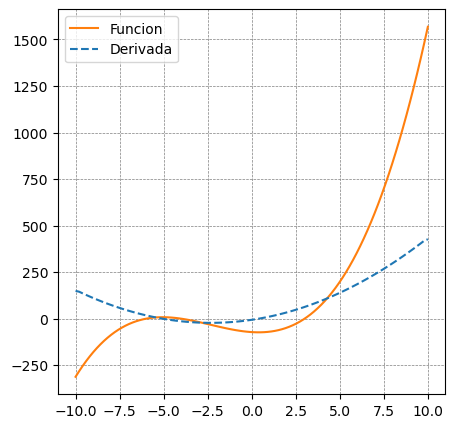

In [18]:
x_para_gradiente = np.linspace(-10.,10.,100)
y_para_gradiente = np.array([ f(i) for i in x_para_gradiente])
derivada = np.gradient(y_para_gradiente,x_para_gradiente)

fig = plt.figure(figsize=(5, 5))
plt.plot(x_para_gradiente,y_para_gradiente,c=jpac_color[3],label='Funcion')
plt.plot(x_para_gradiente,derivada,'--',c=jpac_color[0],label='Derivada')
plt.legend(loc='upper left')
plt.grid(color = jpac_color[9], linestyle = '--', linewidth = 0.5)
plt.show()

## Pregunta: ##

En la figura anterior está representando simultáneamente la función y la derivada. Haciendo uso de los apuntes y sus conocimientos de cálculo. ¿A qué corresponde la curva de la función derivada en relación con la función original? ¿Cuántos ceros tiene la función derivada y cuál es su interpretación? ¿La figura obtenida es coherente con dicha interpretación de la función derivada y con lo que se espera signifiquen los ceros de la función derivada?

**Respuesta:**

*La función derivada $f'(x)$ se corresponde con la pendiente de la función $f(x)$. En la figura se aprecia que la función derivada es positiva cuando la función $f(x)$ es creciente y negativa cuando $f(x)$ es decreciente. Hay dos ceros de $f'(x)$ que se corresponden con los máximos y mínimos locales de la función $f(x)$ como se puede apreciar en la figura.*

### Integración

Vamos a integrar en un cierto rango de $x$ el polinomio $p(x)$ previamente definido en el apartado de resolución de ecuaciones no lineales. Primero hay que definir el integrando.

In [19]:
def integrando(x):
    return np.polyval(ppol,x);

Y para integrar vamos a utilizar la función <code>integrate.quad</code> para integrar $p(x)$ entre -5 y 2, la cuál proporciona dos valores, el resultado de la integral y el error numérico. Complete la siguiente celda rellenado los huecos <code>...</code> y ejecute:

In [20]:
I, error = integrate.quad(integrando, -5, 2)
print('Valor de la integral=',I)
print('Error numérico=',error)

Valor de la integral= -282.9166666666667
Error numérico= 3.254784971292443e-12


## Pregunta: ##

¿Qué significado geométrico tiene el valor de la integral?

**Respuesta:**

*La integral total se corresponde al área existente entre la curva dada por el integrando por encima del eje $x$ menos el área de la misma curva por debajo del eje $x$.*


A continuación pinte la función $F(y)$  definida como $$F(y) = \int_{0}^y p(x) dx$$ en el intervalo $x\in [0,5]$. Complete la siguiente celda rellenado los huecos <code>...</code> y ejecute: 

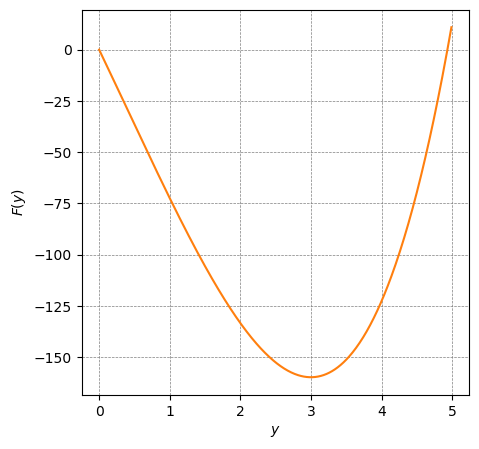

In [36]:
y = np.arange(0,5,0.01)
integral = np.zeros(len(y))
i = 0
for yy in y:
    integral[i], error = integrate.quad(integrando, 0, yy)
    i += 1

fig = plt.figure(figsize=(5, 5))
plt.xlabel('$y$')
plt.ylabel('$F(y)$')
plt.plot(y,integral,c=jpac_color[3])
plt.grid(color = jpac_color[9], linestyle = '--', linewidth = 0.5)
plt.show()

**Con esto se termina la primera PEC de la asignatura.**

**Proceda a imprimirla. En Binder vaya al menú File arriba a la izquierda y seleccione Print. Se debería generar un pdf con toda la práctica. A continuación, suba el pdf antes de las 15:00 del 27 de noviembre de 2026 al apartado de tareas con el epígrafe "PEC 1 (Cálculo Numérico)" del AGORA**

## Información sobre el sistema de calificación ##

El cuaderno tiene 4 secciones en las que se desarrolla código y/o se responde a preguntas. La asignación de puntuación a cada sección es la siguiente:

- **Sistemas de ecuaciones [2 puntos]**, de los cuáles el desarrollo del código vale 1 punto y la respuesta a la pregunta 1 punto.
- **Interpolación [2 puntos]**, de los cuáles el el desarrollo del código vale 2 puntos.
- **Resolución de ecuaciones no lineales [2 puntos]**, de los cuáles el desarrollo del código vale 1 punto y la respuesta a la pregunta 1 punto.
- **Derivación e integración [4 puntos]**, de los cuáles el desarrollo del código de derivación vale 1 punto, el desarrollo del código de la primera integración vale 0,5 puntos,  el desarrollo del código de la segunda integración [calcular $F(y)$] vale 1 punto, la respuesta a la pregunta de derivación vale 1 punto y la respuesta a la pregunta de integración vale 0,5 puntos.

Totalizándose 10 puntos.

Es muy importante que tenga presente que cada PEC es diferente para cada alumno debido a que se utiliza un generador de numeros aleatorios para construir las matrices y funciones.
